In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données d'entraînement
data = pd.read_csv('Stars.csv')

In [2]:
data.shape

(240, 7)

In [3]:
# Affichage des 5 premières lignes des données d'entraînement
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# Affichage des statistiques descriptives des données d'entraînement
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
# Affichage des informations sur les données d'entraînement, y compris les types de données et le nombre de valeurs non nulles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [6]:
#l'asymetrie autour de la moyenne 
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_12924\1622739825.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Temperature    1.321568
L              2.068069
R              1.946800
A_M           -0.121540
Type           0.000000
dtype: float64

## CLEANING DATA

In [7]:
def missing_values(df):
    missing_cols = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_cols.append((col, df[col].isnull().sum()))
    return missing_cols

In [8]:
#liste des colonnes dont manquent des valeurs avec nombre des valeurs manquantes
missing_cols = missing_values(data)
print(missing_cols)

[]


In [9]:
data.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [10]:
for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", data[i].unique())
  #print("\n",i, " --->\n", data[i].value_counts())



 Color  --->
 ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Type  --->
 [0 1 2 3 4 5]


In [11]:
data['Color'] = data['Color'].replace('Blue White', 'Blue-White')
data['Color'] = data['Color'].replace('Blue white', 'Blue-White')
data['Color'] = data['Color'].replace('Blue-white', 'Blue-White')
data['Color'] = data['Color'].replace('Whitish', 'White')
data['Color'] = data['Color'].replace('white', 'White')
data['Color'] = data['Color'].replace('yellow-white', 'White-Yellow')
data['Color'] = data['Color'].replace('Yellowish White', 'White-Yellow')
data['Color'] = data['Color'].replace('yellowish', 'White-Yellow')
data['Color'] = data['Color'].replace('Yellowish', 'White-Yellow')

data['Color'] = data['Color'].replace('Orange-Red', 'Red')
data['Color'] = data['Color'].replace('Pale yellow orange', 'Orange')


In [12]:
for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", data[i].unique())


 Color  --->
 ['Red' 'Blue-White' 'White' 'White-Yellow' 'Orange' 'Blue']

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Type  --->
 [0 1 2 3 4 5]


***CORRELATION***

In [13]:
#calcul des corrélations entre les variables et (colonne cible).
corr_matrix = data.corr()
#corr_matrix['Type'].sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_12924\1240876414.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


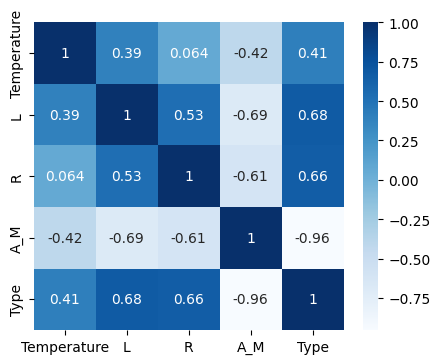

In [14]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix,cmap = 'Blues',annot=True);

In [15]:
corr_matrix['Type'].sort_values(ascending=False)

Type           1.000000
L              0.676845
R              0.660975
Temperature    0.411129
A_M           -0.955276
Name: Type, dtype: float64

## Data Visualization 

<Figure size 1000x1000 with 0 Axes>

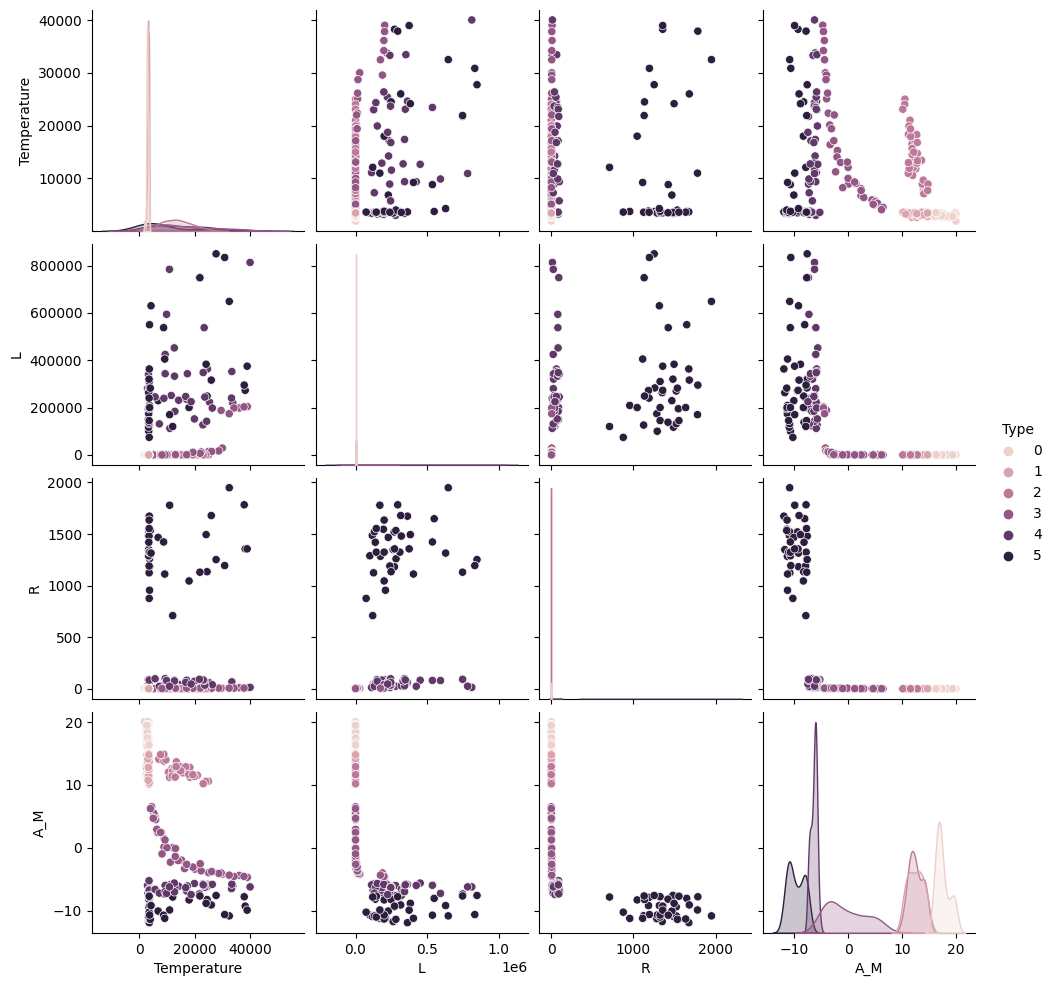

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(data= data, hue='Type'); # pairplot all columns

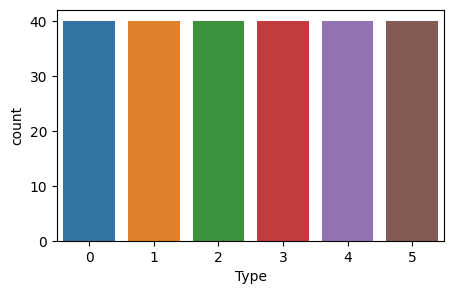

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x=data.Type); # plot Type column

<Axes: xlabel='Spectral_Class', ylabel='count'>

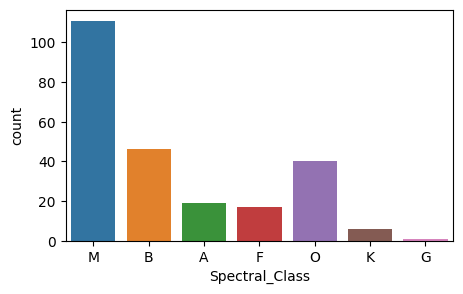

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(x='Spectral_Class', data = data)

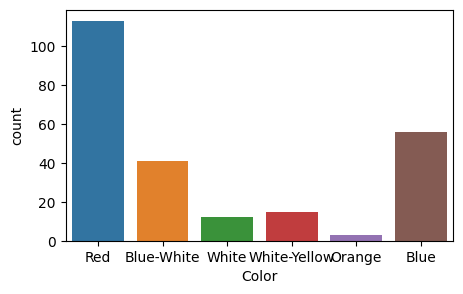

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x=data.Color);

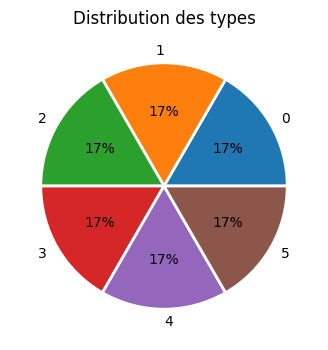

In [20]:
plt.figure(figsize=(4,4))
plt.pie(data["Type"].value_counts().values, labels=data["Type"].unique(), autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Distribution des types")
plt.show()

### La boite a moustache ###

 Pour afficher le BoxPlot de chaque type a la fois pour ne pas repeter le code plusieurs fois on utilise la fonction FaceGrid()

* 1    On affiche la boite a moustache(BoxPlot) de chaque types d'etoile en fonction de la temperature

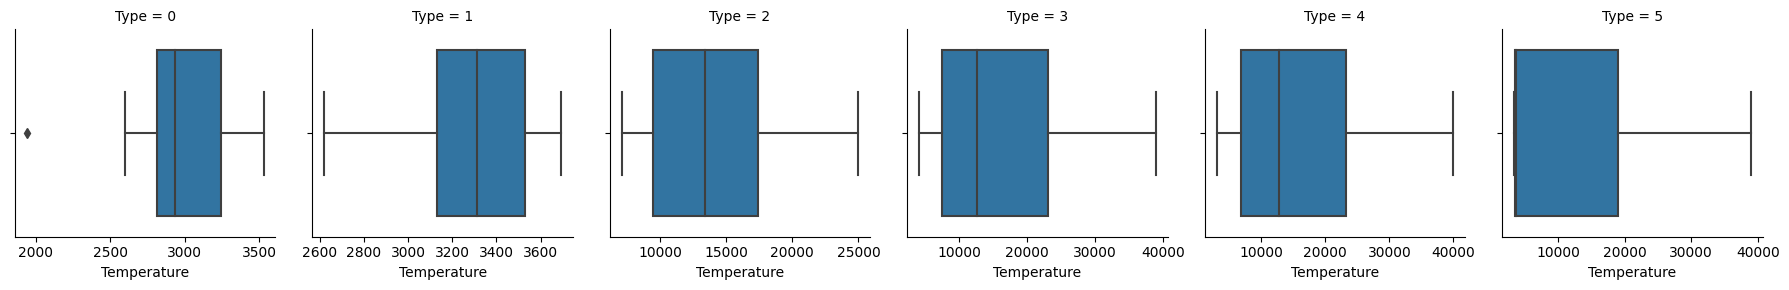

In [21]:
g = sns.FacetGrid(data, col='Type', sharex=False)
g.map_dataframe(sns.boxplot, "Temperature")
plt.show()

* 2  On affiche la boite a moustache(BoxPlot) de chaque types d'etoile en fonction de la luminosité (L)

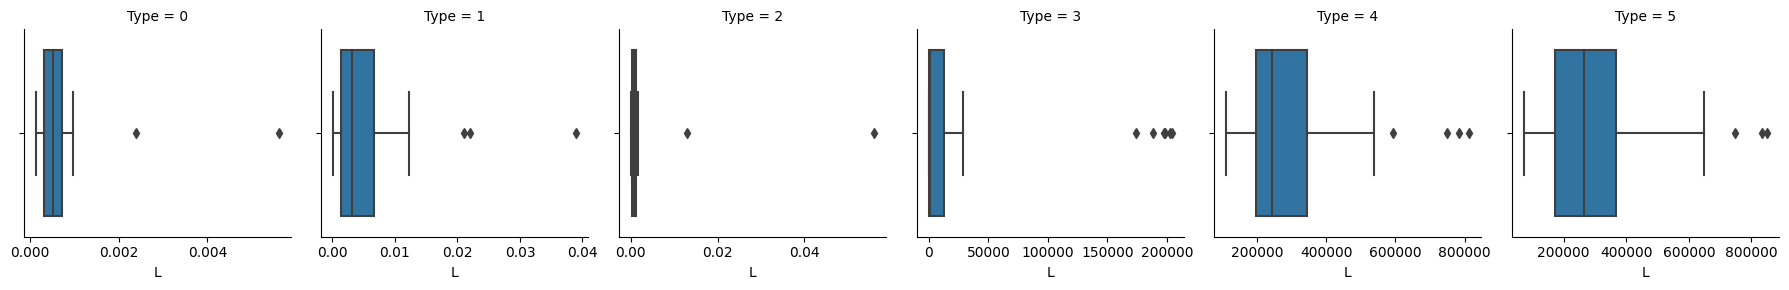

In [22]:
g = sns.FacetGrid(data, col="Type", sharex=False)
g.map_dataframe(sns.boxplot, "L")
plt.show()

* 3 On affiche la boite a moustache(BoxPlot) de chaque types d'etoile en fonction du redius (R)

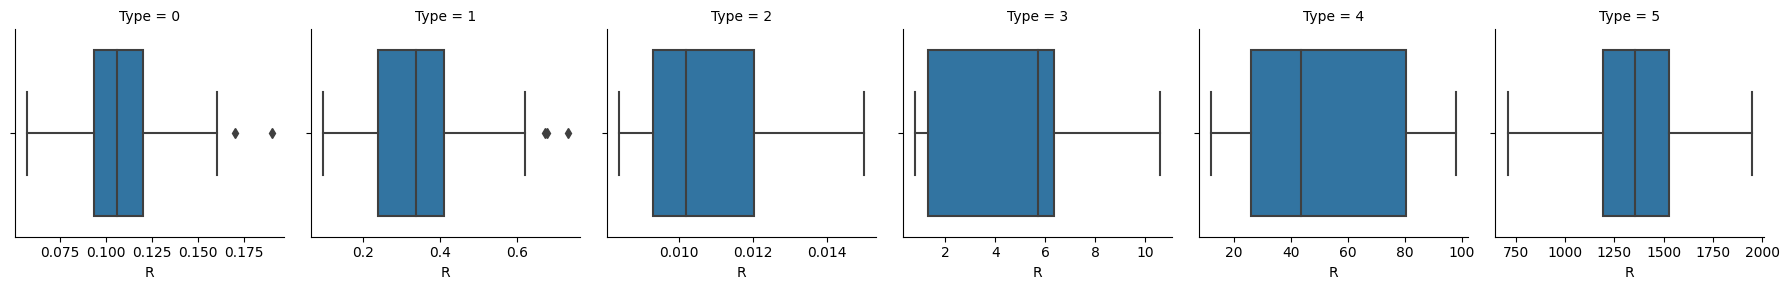

In [23]:
g = sns.FacetGrid(data, col="Type", sharex=False)
g.map_dataframe(sns.boxplot, "R")
plt.show()

* 4 On affiche la boite a moustache(BoxPlot) de chaque types d'etoile en fonction de l'absolute Magnitude (A_M)

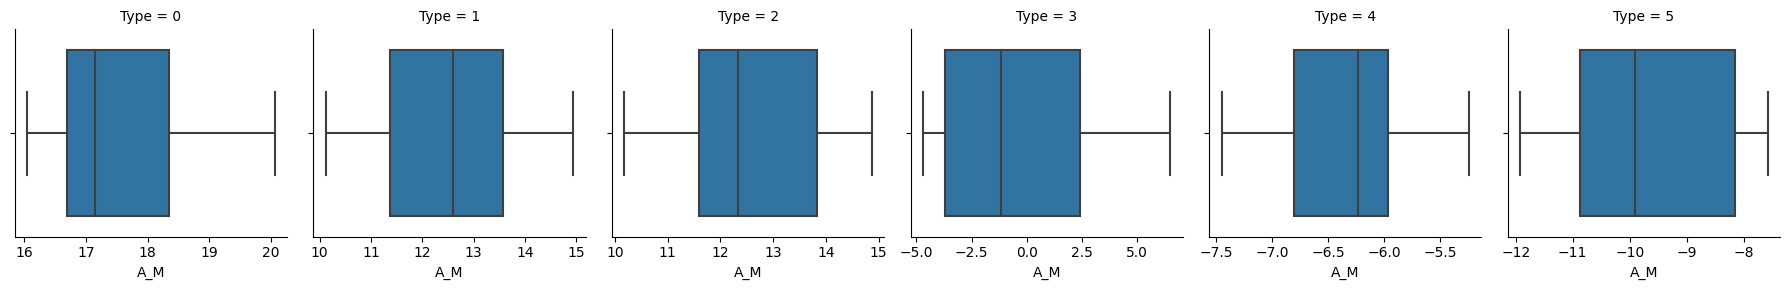

In [24]:
g = sns.FacetGrid(data, col="Type", sharex=False)
g.map_dataframe(sns.boxplot, "A_M")
plt.show()

## Appliquant la data augmentation

In [25]:
data.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [26]:
for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", data[i].unique())


 Color  --->
 ['Red' 'Blue-White' 'White' 'White-Yellow' 'Orange' 'Blue']

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Type  --->
 [0 1 2 3 4 5]


In [27]:
data.shape

(240, 7)

In [ ]:

# Attribuer des nombres à la colonne 'Color'
color_map = {'Red': 1, 'Blue-White': 2, 'White': 3, 'White-Yellow': 4, 'Orange': 5, 'Blue': 6}
df['Color'] = df['Color'].apply(lambda x: color_map[x])

# Attribuer des nombres à la colonne 'Type'
type_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}
df['Type'] = df['Type'].apply(lambda x: type_map[x])

# Ajouter du bruit à la data
df_aug = df.apply(lambda x: x + np.random.normal(loc=0, scale=0.1, size=len(df)) if x.dtype in [np.float64, np.int64] else x)

# Afficher les 10 premières lignes du nouveau jeu de données augmentées
print(df_aug.head(10))


In [34]:

# Charger copie des données
dfa = data.copy

# Ajouter du bruit à la colonne 'Temperature'
noise = np.random.normal(loc=0, scale=0.1, size=len(data))
dfa['Temperature_aug'] = dfa['Temperature'] + noise

# Ajouter du bruit à la colonne 'L'
noise = np.random.normal(loc=0, scale=0.05, size=len(dfa))
dfa['L_aug'] = dfa['L'] + noise

# Ajouter du bruit à la colonne 'R'
noise = np.random.normal(loc=0, scale=0.02, size=len(dfa))
dfa['R_aug'] = dfa['R'] + noise

# Ajouter du bruit à la colonne 'A_M'
noise = np.random.normal(loc=0, scale=0.01, size=len(dfa))
dfa['A_M_aug'] = dfa['A_M'] + noise

# Ajouter du bruit à la colonne 'Color'
noise = np.random.choice(['+', '-'], size=len(dfa))
dfa['Color_aug'] = [f"{c}{n}" for c, n in zip(dfa['Color'], noise)]

# Ajouter du bruit à la colonne 'Spectral_Class'
noise = np.random.choice(['+', '-'], size=len(dfa))
dfa['Spectral_Class_aug'] = [f"{c}{n}" for c, n in zip(dfa['Spectral_Class'], noise)]

# Ajouter du bruit à la colonne 'Type'
noise = np.random.normal(loc=0, scale=0.1, size=len(dfa))
dfa['Type_aug'] = dfa['Type'] + noise.round().astype(int)

# Afficher les 10 premières lignes du nouveau jeu de données
dfa.head(10)


TypeError: 'method' object is not subscriptable

In [ ]:
# Chargement des données d'entraînement
dt = pd.read_csv('augmented_data.csv')

In [ ]:
dt.shape

(240, 7)

## Encoding

In [ ]:
df=pd.get_dummies(data=data,columns=["Color","Spectral_Class"],drop_first=True)

In [ ]:
df

,Temperature,L,R,A_M,Type,Color_Blue-White,Color_Orange,Color_Red,Color_White,Color_White-Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,1,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,1,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,1,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,1,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,1,0,0,0,0,0,0,0


## Réduction de dimension ##

In [ ]:
df.sample(10) 

,Temperature,L,R,A_M,Type,Color_Blue-White,Color_Orange,Color_Red,Color_White,Color_White-Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
193,3212,0.001600,0.3780,12.854,1,0,0,1,0,0,0,0,0,0,1,0
189,3523,0.000957,0.1290,16.350,0,0,0,1,0,0,0,0,0,0,1,0
112,3615,200000.000000,1635.0000,-11.330,5,0,0,1,0,0,0,0,0,0,1,0
125,3225,0.000760,0.1210,19.630,0,0,0,1,0,0,0,0,0,0,1,0
85,9675,0.000450,0.0109,13.980,2,1,0,0,0,0,0,0,0,0,0,0
61,3432,0.000670,0.1900,16.940,0,0,0,1,0,0,0,0,0,0,1,0
138,3324,0.003400,0.3400,12.230,1,0,0,1,0,0,0,0,0,0,1,0
76,2890,0.003400,0.2400,13.460,1,0,0,1,0,0,0,0,0,0,1,0
150,29560,188000.000000,6.0200,-4.010,3,1,0,0,0,0,1,0,0,0,0,0
204,18340,0.001340,0.0124,11.220,2,0,0,0,0,0,1,0,0,0,0,0


le Type est notre target.

In [ ]:
target= df['Type']
df.drop(columns=['Type'], inplace=True)

***We apply Data Scaling and ACP on our DataFrame***

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

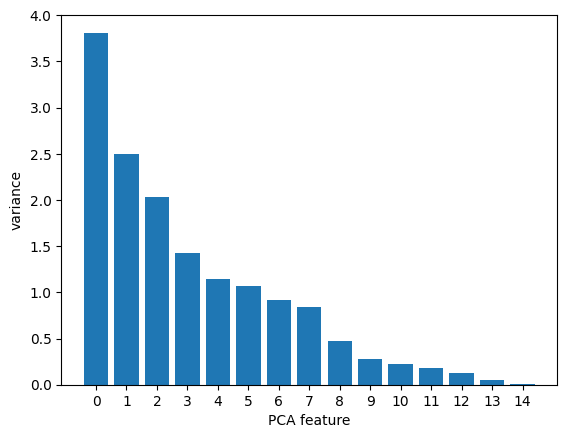

In [ ]:
scaler = StandardScaler()

pca = PCA()

pipeline = make_pipeline(scaler, pca)

#learning pour trouver les meilleures pca features
pipeline.fit(df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

**Conclusion**

À partir de ce graphique, nous pouvons voir que les 5 premières PCA features ont la plus grande variance, avec une nette différence avec d’autres caractéristiques.

On Applique le scaling sur notre DataFrame.

In [ ]:
scaled = scaler.fit_transform(df)
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled.head()

,Temperature,L,R,A_M,Color_Blue-White,Color_Orange,Color_Red,Color_White,Color_White-Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.598624,-0.459210,1.116745,-0.453905,-0.112509,1.060139,-0.229416,-0.258199,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
1,-0.782110,-0.598624,-0.459241,1.162414,-0.453905,-0.112509,1.060139,-0.229416,-0.258199,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
2,-0.828477,-0.598624,-0.459342,1.362213,-0.453905,-0.112509,1.060139,-0.229416,-0.258199,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
3,-0.807496,-0.598624,-0.459229,1.167171,-0.453905,-0.112509,1.060139,-0.229416,-0.258199,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
4,-0.897819,-0.598624,-0.459340,1.491607,-0.453905,-0.112509,1.060139,-0.229416,-0.258199,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214


On Applique l'ACP sur notre DataFrame.

In [ ]:
pca = PCA(n_components = 5)
pca.fit(scaled)
pca_features = pca.transform(scaled)
print(pca_features.shape)

(240, 5)


## Diviser la DataFrame en Traning-set et Testing-set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(pca_features, target,test_size=0.2, random_state=17) 

***On a diviser notre DataFrame en : 20% Testing-set et 80% Trainig-set.***